<a href="https://colab.research.google.com/github/rajni-arora/Machine-Learning-2024/blob/main/Linear_Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install gdown==v4.6.3

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [3]:
!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR

Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /content/cars24-car-price-cleaned.csv
100% 1.69M/1.69M [00:00<00:00, 90.8MB/s]


In [26]:
df = pd.read_csv("cars24-car-price-cleaned.csv")
df[:5]

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


### Description of dataset
selling_price: The price at which the car is being sold.

year: The year when the car was manufactured.

km_driven: How many kilometers the car has been driven.

mileage: The fuel efficiency of the car, usually in kilometers per liter.

engine: The size of the car's engine, usually in cubic centimeters (cc).

max_power: The maximum power the car's engine can produce, usually in horsepower or kilowatts.

age: How old the car is, calculated from the current year.

make: The brand or company that manufactured the car.

model: The specific model or version of the car.

Individual: Indicates if the seller is an individual person (usually marked as 1 for yes, 0 for no).

Trustmark Dealer: Indicates if the seller is a certified dealer (usually marked as 1 for yes, 0 for no).

Diesel, Electric, LPG, Petrol: These columns indicate the type of fuel the car uses. A '1' under one of these means the car uses that type of fuel, and '0' means it does not.

Manual: Indicates if the car has a manual transmission (1 for yes, 0 for no).

5, >5: These columns seem to indicate the number of seats in the car. '5' would mean the car has exactly 5 seats, and '>5' means the car has more than 5 seats. These are marked with 1 for yes, and 0 for no.

In [27]:
df['model'].nunique()

3233

Here we cant do one hot encoding for 3233.

### Target variable Encoding

To covert all the values in numbers

In [32]:
df['make'] = df.groupby('make')['selling_price'].transform('mean')

In [33]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [34]:
df['model'] = df.groupby('model')['selling_price'].transform('mean')

In [37]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


### Scaling

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scale = MinMaxScaler()
scale.fit_transform(df)

array([[0.04368402, 0.68965517, 0.03155346, ..., 1.        , 1.        ,
        0.        ],
       [0.25239655, 0.82758621, 0.00523698, ..., 1.        , 1.        ,
        0.        ],
       [0.08979493, 0.62068966, 0.01576357, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.19172431, 0.79310345, 0.01760573, ..., 1.        , 1.        ,
        0.        ],
       [0.5800267 , 0.82758621, 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.56789225, 0.93103448, 0.00339483, ..., 0.        , 1.        ,
        0.        ]])

In [43]:
 df = pd.DataFrame(scale.fit_transform(df), columns = df.columns)

In [44]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


### Train Test Split

In [45]:
from sklearn.model_selection import train_test_split

frist we need to split X and Y then only we do train test split

Independent variable = Y = Selling_price

In [48]:
y = df['selling_price']
x = df.drop('selling_price',axis=1)

In [49]:
y

0        0.043684
1        0.252397
2        0.089795
3        0.095134
4        0.262104
           ...   
19815    0.300934
19816    0.434413
19817    0.191724
19818    0.580027
19819    0.567892
Name: selling_price, Length: 19820, dtype: float64

In [50]:
x

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19815,0.862069,0.018258,0.168879,0.202014,0.099919,0.137931,0.484670,0.328028,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
19816,0.931034,0.004711,0.116379,0.203347,0.138647,0.068966,0.194048,0.330632,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
19817,0.793103,0.017606,0.147759,0.221860,0.158647,0.206897,0.318156,0.200656,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
19818,0.827586,1.000000,0.103448,0.322719,0.217391,0.172414,0.324782,0.377671,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [51]:
x.shape, y.shape

((19820, 17), (19820,))

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

In [70]:
X1 = x[['model']]
X1.head()

,model
0,0.041550
1,0.218382
2,0.149143
3,0.093193
4,0.313574


In [58]:
X1_train = X_train[['model']]
X1_test = X_test[['model']]

In [60]:
from sklearn.linear_model import LinearRegression

Initialize linear regression

In [61]:
lm = LinearRegression()

model training from here

In [62]:
lm.fit(X1_train, y_train)

LinearRegression()

This will give me value of m and c from line

This will give me m and c value for best fit line

In [65]:
m = lm.coef_
m

array([0.9967642])

In [66]:
c = lm.intercept_
c

0.0015237505846132926

y = mx+c is predict function doing

In [71]:
lm.predict(X1)

array([0.04293954, 0.21919884, 0.15018463, ..., 0.20153052, 0.37797252,
       0.51930761])

model vs price

y_hat is the predicted values

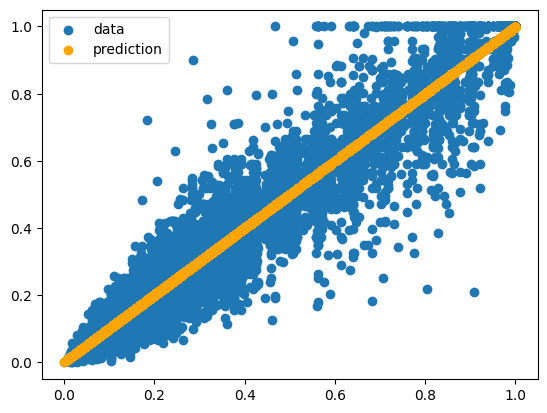

In [72]:
y_hat = lm.predict(X1)
fig = plt.figure()
plt.scatter(X1,y,label='data')
plt.scatter(X1,y_hat,color='orange',label='prediction')
plt.legend()
plt.show()

Similarly we can do for complete datset

In [73]:
lm.fit(X_train, y_train)

LinearRegression()

In [75]:
X_train.shape

(13874, 17)

coeff = m = weights

In [77]:
lm.coef_

array([ 7.23382199e+11, -2.50488281e-01, -2.32558310e-01,  7.39953774e-02,
        4.68742062e-02,  7.23382199e+11,  6.61604471e-02,  8.58973267e-01,
       -7.18488746e-03, -7.03116019e-03,  6.98577387e-03,  1.32957359e-01,
        1.50077817e-02, -6.83704171e-03, -3.69616522e-03, -1.62563011e-02,
       -2.35725832e-02])

In [78]:
lm.coef_.shape

(17,)

In [79]:
lm.intercept_

-723382198910.7482

### Score / Accuracy

In [80]:
print(lm.score(X_train, y_train))
print(lm.score(X_test, y_test))

0.9459004943250285
0.945987722055055
